# **Упражнение 1.1**
Прочитать пояснения и запустить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap01.ipynb .

**Ход работы:**

По представленной ссылке была изучена работа примеров.


In [10]:
import os
!pip install wget
if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('piano-loop-220727.wav'):
    !python -m wget https://github.com/DmitReiCat/SPBSTU-Telecom-Labs/raw/master/chap01/piano-loop-220727.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Saved under piano-loop-220727.wav


# **Упражнение 1.2**

  Скачайте с сайта http://freesound.org образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полуcекундный сегмент, в котором высота постоянная. Вычислите и распечатайте спектр выбранного сегмента. Как связаны тембр звука и гармоническая структура, видимая в спектре?

  Используйте *high_pass*, *low_pass* и *band_stop* для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и послушайте его. Как звук соотноситься с изменениями, сделанными в спектре?

**Ход работы:**

В качестве исходного звука мною был выбран звук игры на пианино.


In [27]:
from thinkdsp import read_wave
from thinkdsp import decorate
wave = read_wave('piano-loop-220727.wav')
wave.normalize()
wave.make_audio()

Output hidden; open in https://colab.research.google.com to view.

Посмотрим на график звука.

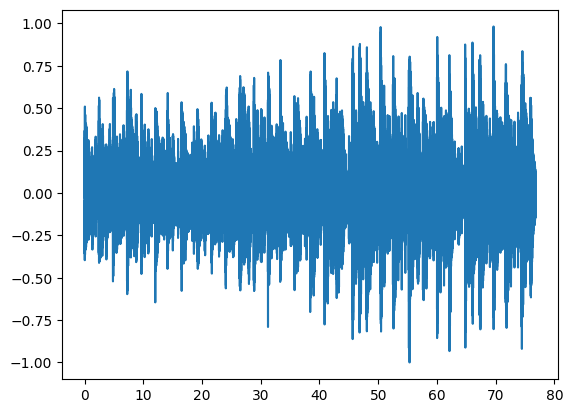

In [28]:
wave.plot()

Видим, что для наших целей примерно подходит временной промежутке от 0 до 0.1 с. Выделим его в отдельный сегмент.

In [48]:
segment = wave.segment(start=1.95, duration=0.4)
segment.make_audio()

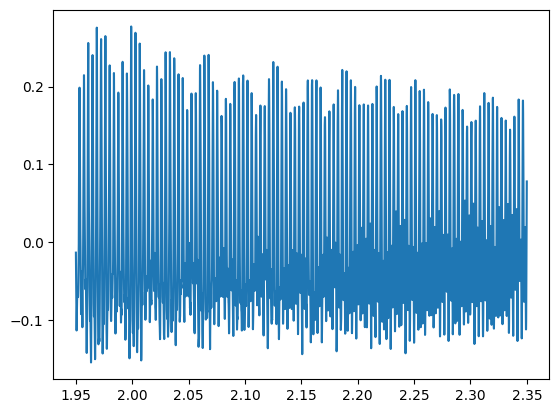

In [49]:
segment.plot()

Распечатаем спектр сегмента и проанализируем его.

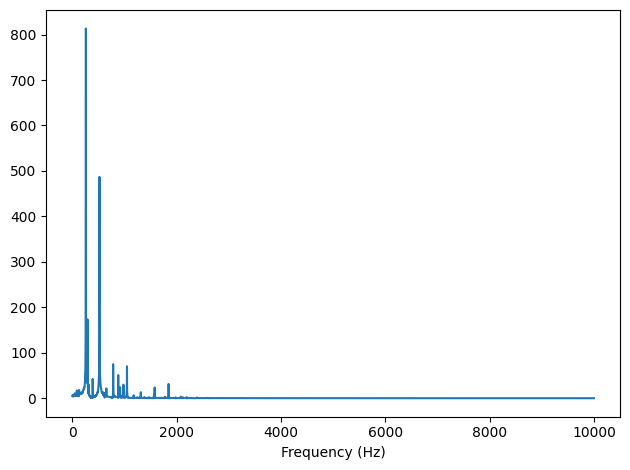

In [50]:
spectrum = segment.make_spectrum()
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

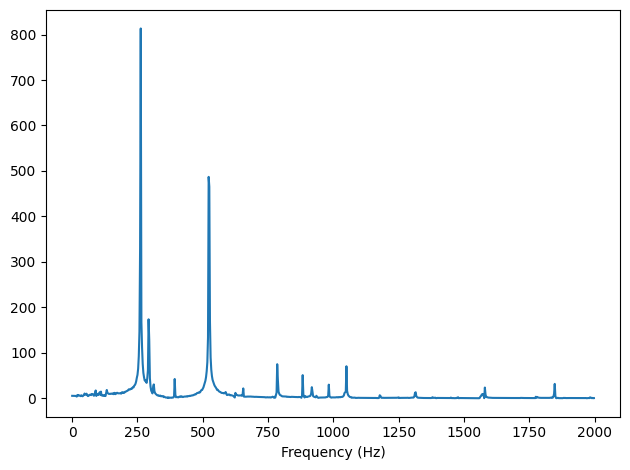

In [54]:
spectrum.plot(high=2000)
decorate(xlabel='Frequency (Hz)')

In [36]:
spectrum.peaks()[:30]

[(813.3647713333859, 262.5),
 (486.946769378258, 522.5),
 (465.1222504926129, 525.0),
 (329.7045594485268, 260.0),
 (173.641277374474, 292.5),
 (168.7067021157826, 527.5),
 (167.8366272088975, 265.0),
 (146.30851038112365, 257.5),
 (133.80133005081444, 520.0),
 (128.92852874714933, 295.0),
 (112.0967330307948, 267.5),
 (92.69355072743986, 255.0),
 (90.05880626487108, 530.0),
 (79.52762430400122, 517.5),
 (75.6841733546337, 270.0),
 (74.87510668203619, 785.0),
 (70.37791154355673, 1050.0),
 (64.84554345830865, 252.5),
 (62.975788076626756, 532.5),
 (61.89632815244081, 290.0),
 (59.642341177296814, 515.0),
 (55.92224334012204, 272.5),
 (51.454826057465084, 250.0),
 (50.884894947028705, 882.5),
 (49.064370495822935, 535.0),
 (46.6416170031749, 512.5),
 (46.376585947796734, 275.0),
 (45.098841627226456, 247.5),
 (44.219984079485386, 287.5),
 (43.93229288683078, 297.5)]

Наблюдаем пики 263, 522, 785 Гц. Доминантная - 263, отсюда рсчитаем фундаментальную: ~260 Гц ~= 256.87 Гц = C4, с гармониками в 500, 750, 1000.

Теперь используем *high_pass*, *bass_pass* и *band_stop* для фильтрации различных гармоник.

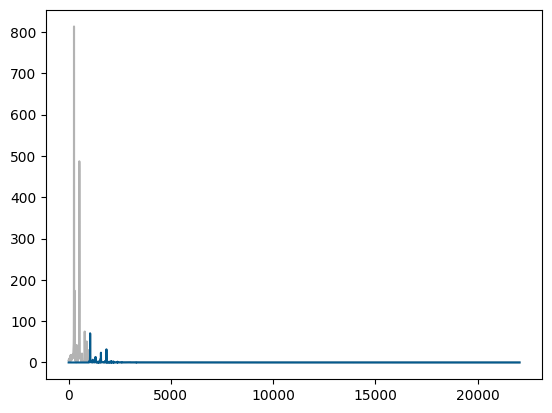

In [59]:
import matplotlib.pyplot as plt
from IPython.display import display

spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.high_pass(1000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

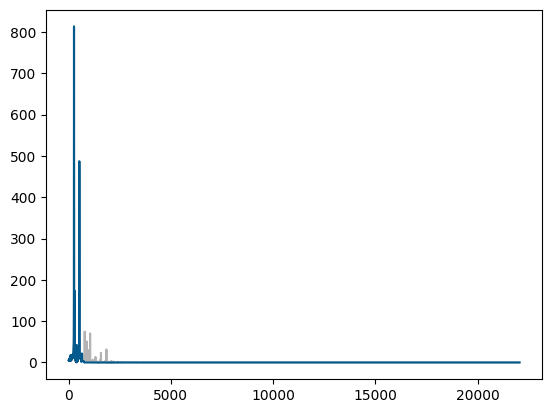

In [63]:
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.low_pass(750)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

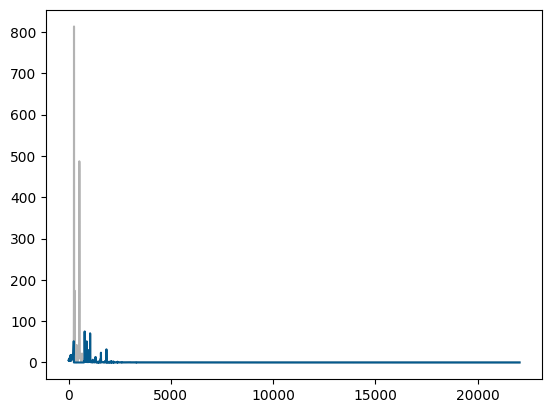

In [62]:
spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.band_stop(250, 750)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

Как видно из графиков и слышно при прослушвании *low_pass* - срезал частоты ниже частоты среза, *high_pass* - срезал частоты выше частоты среза, а *band_stop* - срезал все частоты в указанной полосе частот.

# **Упражнение 1.3**

Создайте сложный сигнал из объектов *SinSignal* и *CosSignal* суммируя их. Обработайте сигнал для получения *wave* и прослушайте его. Вычислите *Spectrum* и распечатайте. Что произойдёт при добавлении частотных компонент, не кратных основным?

In [104]:
from thinkdsp import CosSignal, SinSignal
from IPython.display import Audio

cos_sig = (CosSignal(freq=40 * 20, amp=2.0, offset=0) +
           CosSignal(freq=40 * 16, amp=1.0, offset=0))
sin_sig = (SinSignal(freq=40 * 49, amp=0.5, offset=1.5) +
           SinSignal(freq=40 * 10, amp=1.5, offset=1.5))

mix = sin_sig + cos_sig
wave = mix.make_wave(duration=2, start=0, framerate=11025)
wave.make_audio()

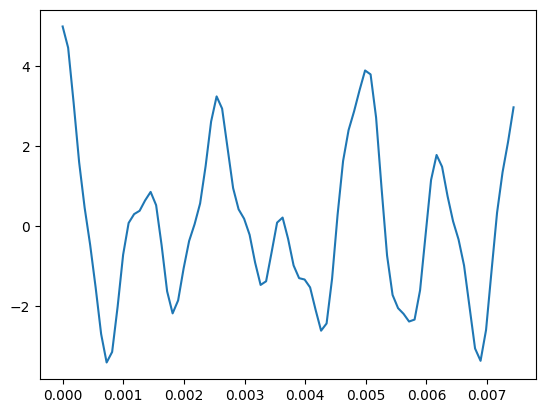

In [105]:
mix.plot()

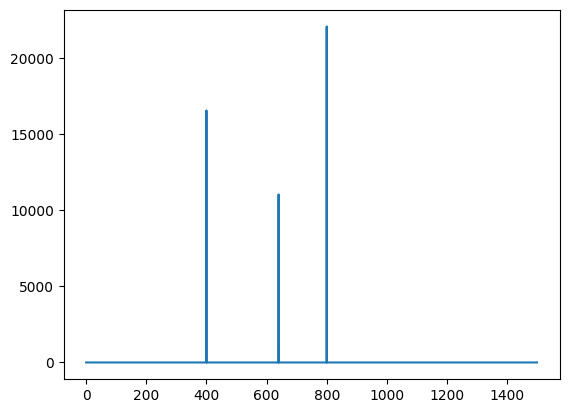

In [106]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1500)

Попробуем добавить частоту не кратную основным.

In [107]:
mix += SinSignal(freq=505)
mix.make_wave().make_audio()

Добавив частотную компонентну не кратную основным мы теперь можем явно услышать инородный звук в основном звуке (тембр звука изменился).

# **Упражнение 1.4**

Напишите функцию *stretch*, берущую *wave* и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением *ts* и *framerate*. Подсказка: должно получиться всего две строки кода.

Напишу оба варианта функции. При увеличении в *coeff* *ts* и уменьшении в этот же коэффициент *framerate* звук будет замедляться, а при обратном алгоритме - ускоряться.

In [86]:
def stretch_slower(wave, factor):
  wave.ts *= factor
  wave.framerate /= factor

def stretch_faster(wave, factor):
  wave.ts /= factor
  wave.framerate *= factor

Проверим работу функции на том же звуке, что и в упражнении 1.1.

In [88]:
wave = read_wave('piano-loop-220727.wav')
wave.normalize()
wave.make_audio()

Output hidden; open in https://colab.research.google.com to view.

In [89]:
stretch_slower(wave, 1.5)
wave.make_audio()

Output hidden; open in https://colab.research.google.com to view.

In [91]:
wave = read_wave('piano-loop-220727.wav')
wave.normalize()
stretch_faster(wave, 1.5)
wave.make_audio()

Output hidden; open in https://colab.research.google.com to view.